In [1]:
import xarray as xr
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
dataset = pd.read_csv('/media/sany/SSD/Document/Project_research/Climate/ML_CYCLONE/Data/April 12 Final (6-24)Date_added - Finaldata1979-2020116.csv')
dataset

,Cyclone No,Date,hours,minMSL,Maxwind,lat,lon,lat+1,lon+1,lat+2,...,lat+5,lon+5,lat+6,lon+6,lat+12,lon+12,lat+18,lon+18,lat+24,lon+24
0,1,1979-05-07 22:00:00,1,99568.805,17.309776,6.75,86.50,6.75,86.25,6.75,...,6.75,86.00,6.75,86.00,6.50,86.00,6.50,86.00,7.75,86.25
1,1,1979-05-07 23:00:00,2,99571.960,15.422698,6.75,86.25,6.75,86.25,6.75,...,6.75,86.00,6.75,85.75,6.25,86.00,6.75,86.00,7.75,86.25
2,1,1979-05-08 0:00:00,3,99591.305,15.190290,6.75,86.25,6.75,86.00,6.75,...,6.75,85.75,6.75,86.00,6.25,86.00,6.75,86.25,8.00,86.25
3,1,1979-05-08 1:00:00,4,99651.000,15.313608,6.75,86.00,6.75,86.00,6.75,...,6.75,86.00,6.75,86.00,6.50,85.75,7.00,86.50,8.00,86.25
4,1,1979-05-08 2:00:00,5,99684.900,15.582188,6.75,86.00,6.75,86.00,6.75,...,6.75,86.00,6.75,86.00,6.50,86.00,7.25,86.50,8.00,86.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,55,2020-11-26 5:00:00,46,100028.670,18.663320,13.00,79.75,13.25,79.75,13.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4434,55,2020-11-26 6:00:00,47,100032.140,18.751280,13.25,79.75,13.25,79.50,13.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4435,55,2020-11-26 7:00:00,48,99978.140,18.789482,13.25,79.50,13.50,79.75,13.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4436,55,2020-11-26 8:00:00,49,99899.230,18.364544,13.50,79.75,13.50,79.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

,Cyclone No,hours,minMSL,Maxwind,lat,lon,lat+1,lon+1,lat+2,lon+2,lat+3,lon+3,lat+4,lon+4,lat+5,lon+5,lat+6,lon+6
0,1,1,99568.805,17.309776,6.75,86.50,6.75,86.25,6.75,86.25,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00
1,1,2,99571.960,15.422698,6.75,86.25,6.75,86.25,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75
2,1,3,99591.305,15.190290,6.75,86.25,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75,6.75,86.00
3,1,4,99651.000,15.313608,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75,6.75,86.00,6.75,86.00
4,1,5,99684.900,15.582188,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75,6.75,86.00,6.75,86.00,6.75,86.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,55,46,100028.670,18.663320,13.00,79.75,13.25,79.75,13.25,79.50,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN
4434,55,47,100032.140,18.751280,13.25,79.75,13.25,79.50,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN,NaN,NaN
4435,55,48,99978.140,18.789482,13.25,79.50,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4436,55,49,99899.230,18.364544,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#select features and target
#X = dataset.iloc[:,[0,1,2,3,4,11]].values
X = dataset.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values #for 6 hours prediction
Y = np.column_stack((dataset['lon+12'], dataset['lat+12']))

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [6]:
X

array([[1.00000000e+00, 1.00000000e+00, 9.95688050e+04, ...,
        8.60000000e+01, 6.75000000e+00, 8.60000000e+01],
       [1.00000000e+00, 2.00000000e+00, 9.95719600e+04, ...,
        8.60000000e+01, 6.75000000e+00, 8.57500000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.95913050e+04, ...,
        8.57500000e+01, 6.75000000e+00, 8.60000000e+01],
       ...,
       [5.50000000e+01, 4.80000000e+01, 9.99781400e+04, ...,
        8.68428417e+01, 1.65556232e+01, 8.68283228e+01],
       [5.50000000e+01, 4.90000000e+01, 9.98992300e+04, ...,
        8.68428417e+01, 1.65556232e+01, 8.68283228e+01],
       [5.50000000e+01, 5.00000000e+01, 9.98672100e+04, ...,
        8.68428417e+01, 1.65556232e+01, 8.68283228e+01]])

In [7]:
# Convert in numeric 
from sklearn.preprocessing import LabelEncoder
le_date = LabelEncoder()
#X[:,1] = le_date.fit_transform(X[:,1])

In [8]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)
print("-----------------------------------------------------------------")
print(Y)

[[-1.73798725e+00 -1.41957570e+00  7.41379446e-01 ... -2.57590622e-01
  -2.59770058e+00 -2.55110196e-01]
 [-1.73798725e+00 -1.38751489e+00  7.45289949e-01 ... -2.57590622e-01
  -2.59770058e+00 -3.32106205e-01]
 [-1.73798725e+00 -1.35545408e+00  7.69267344e-01 ... -3.33996020e-01
  -2.59770058e+00 -2.55110196e-01]
 ...
 [ 1.62763127e+00  8.72822618e-02  1.24873468e+00 ...  0.00000000e+00
  -9.41183055e-16 -4.37671642e-15]
 [ 1.62763127e+00  1.19343069e-01  1.15092872e+00 ...  0.00000000e+00
  -9.41183055e-16 -4.37671642e-15]
 [ 1.62763127e+00  1.51403877e-01  1.11124114e+00 ...  0.00000000e+00
  -9.41183055e-16 -4.37671642e-15]]
-----------------------------------------------------------------
[[86.          6.5       ]
 [86.          6.25      ]
 [86.          6.25      ]
 ...
 [86.7444415  16.70692165]
 [86.7444415  16.70692165]
 [86.7444415  16.70692165]]


In [9]:
# information
print("Total number of Cyclone:" + str(dataset["Cyclone No"][4437]))
print("--------------------------")
print(dataset["Cyclone No"][2960:3100])


Total number of Cyclone:55
--------------------------
2960    39
2961    39
2962    39
2963    39
2964    40
        ..
3095    40
3096    40
3097    40
3098    40
3099    41
Name: Cyclone No, Length: 140, dtype: int64


In [10]:
X[:2]

array([[-1.73798725, -1.4195757 ,  0.74137945, -0.67300485, -2.41235007,
        -0.12350485, -2.44133926, -0.19432021, -2.47086912, -0.19124124,
        -2.50068168, -0.26316801, -2.53230083, -0.26038189, -2.56466213,
        -0.25759062, -2.59770058, -0.2551102 ],
       [-1.73798725, -1.38751489,  0.74528995, -1.20909391, -2.41235007,
        -0.19702792, -2.44133926, -0.19432021, -2.47086912, -0.26588206,
        -2.50068168, -0.26316801, -2.53230083, -0.26038189, -2.56466213,
        -0.25759062, -2.59770058, -0.33210621]])

In [11]:
# Splitting without randomize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
k = 2964 #index for 39'th cyclone

X_train = X[:k,:]
X_test = X[k:,:]    

Y_train = Y[:k]    
Y_test= Y[k:] 

In [12]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

## ANN Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [14]:
print("X_train.shape, Y_train.shape, X_test.shape, Y_train.shape")
print(X_train.shape,Y_train.shape,X_test.shape,Y_train.shape)

X_train.shape, Y_train.shape, X_test.shape, Y_train.shape
(2964, 18) (2964, 2) (1474, 18) (2964, 2)


In [15]:
#model.summary()
#[layer1, layer2, layer3, layer4] = model.layers

# Examine Weights shapes
#W1,b1 = layer1.get_weights()
#W2,b2 = layer2.get_weights()
#W3,b3 = layer3.get_weights()

#print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
#print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
#print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


In [16]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=20,verbose=1, mode='min')

# Define model 
model = Sequential([
    tf.keras.Input((X_train.shape[1]),),
    Dense(units=100, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu', name='L1'),
    Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu', name='L2'), 
    Dense(units=2, activation='linear', name='L3'),
], name='my_model')

# Compile model
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)

# Fit model with early stopping
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=100, batch_size=32, verbose=1, callbacks=[early_stop])


Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 47.1063 - mean_absolute_error: 47.4049 - val_loss: 39.8990 - val_mean_absolute_error: 40.1707
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 24.0578 - mean_absolute_error: 24.2806 - val_loss: 16.1827 - val_mean_absolute_error: 16.3579
Epoch 3/100
63/63 [==============================] - 0s 944us/step - loss: 11.2653 - mean_absolute_error: 11.4367 - val_loss: 16.6049 - val_mean_absolute_error: 16.7924
Epoch 4/100
63/63 [==============================] - 0s 971us/step - loss: 8.8026 - mean_absolute_error: 8.9730 - val_loss: 17.5993 - val_mean_absolute_error: 17.7880
Epoch 5/100
63/63 [==============================] - 0s 922us/step - loss: 7.0624 - mean_absolute_error: 7.2260 - val_loss: 17.6146 - val_mean_absolute_error: 17.8069
Epoch 6/100
63/63 [==============================] - 0s 903us/step - loss: 6.1177 - mean_absolute_error: 6.2783 - val_loss: 17.0351 - val_mean_absolute_error: 17.2

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


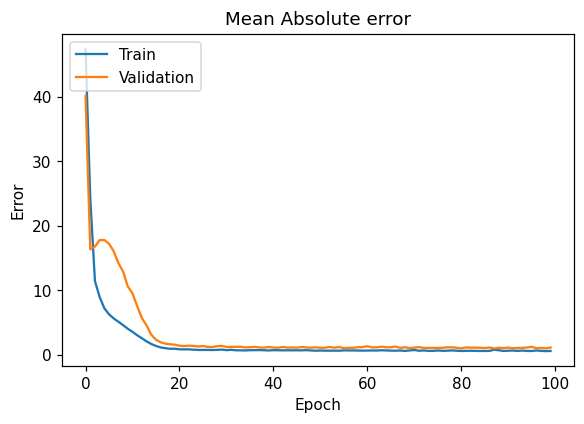

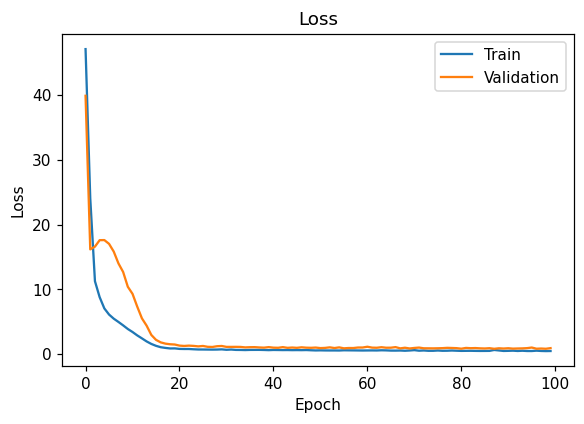

In [17]:
print(history.history.keys())

# summarize history for accuracy
#with plt.style.context('ggplot'):
plt.figure(dpi=110)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# summarize history for loss
#with plt.style.context('ggplot'):
plt.figure(dpi=110)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
    


In [18]:
Y_pred = model.predict(X_test)
print(Y_pred[:10])

[[89.16904   8.563772]
 [89.56007   8.654091]
 [89.953964  8.546458]
 [89.99413   8.540205]
 [90.24208   8.609192]
 [90.5949    8.615863]
 [90.857735  8.753625]
 [90.82892   9.083058]
 [90.80851   9.105863]
 [89.92737   9.649081]]


In [19]:
lon_test = Y_test[:,0]
lat_test = Y_test[:,1]

lon_pred = Y_pred[:,0]
lat_pred = Y_pred[:,1]

random_dataset = pd.DataFrame()
random_dataset['lon_test'] = lon_test
random_dataset['lat_test'] = lat_test

random_dataset['lon_pred'] = lon_pred
random_dataset['lat_pred'] = lat_pred
random_dataset['deviation'] = np.sqrt(((lon_test-lon_pred)**2)+ ((lat_test-lat_pred)**2))

print("  ")
print("The average error for the deviation is "+ str(random_dataset['deviation'].mean()))
print("  ")

random_dataset

  
The average error for the deviation is 2.31455238140805
  


,lon_test,lat_test,lon_pred,lat_pred,deviation
0,89.750000,7.250000,89.169037,8.563772,1.436494
1,89.750000,7.750000,89.560066,8.654091,0.923826
2,89.750000,7.750000,89.953964,8.546458,0.822160
3,88.500000,8.750000,89.994133,8.540205,1.508790
4,88.500000,8.750000,90.242081,8.609192,1.747762
...,...,...,...,...,...
1469,86.744442,16.706922,89.727440,17.831543,3.187954
1470,86.744442,16.706922,89.195808,17.588236,2.604979
1471,86.744442,16.706922,88.466736,17.552881,1.918840
1472,86.744442,16.706922,87.916565,17.493040,1.411331


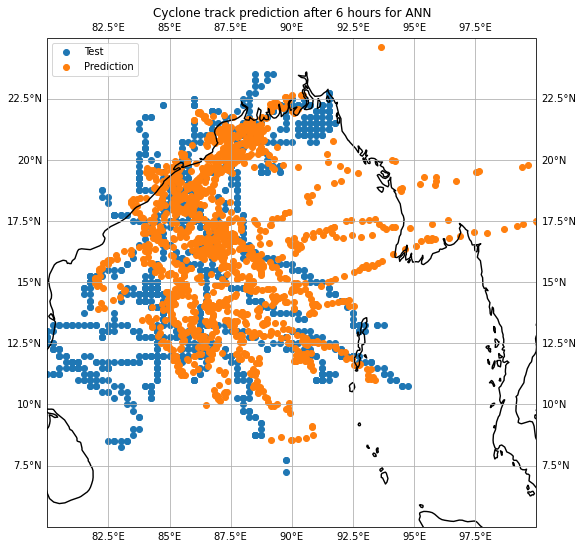

In [20]:
import xarray as xr

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title("Cyclone track prediction after 6 hours for ANN")


plt.scatter(lon_test, lat_test, label='Test')
plt.scatter(lon_pred, lat_pred, label='Prediction')

ax.coastlines(linewidth=1.4)
ax.gridlines(draw_labels=True)
ax.set_extent([80, 100, 5, 25]) 

plt.legend(loc='upper left')

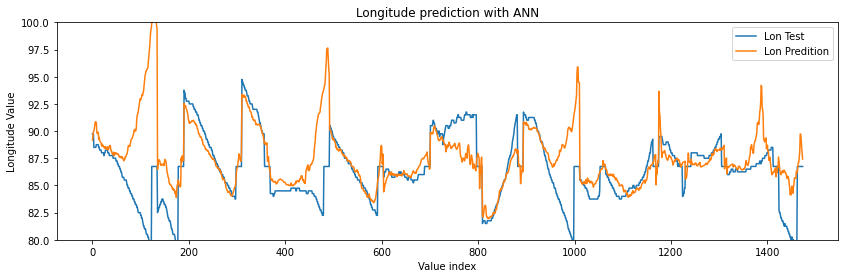

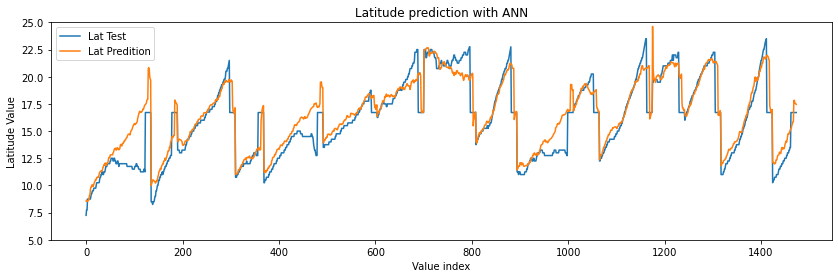

In [21]:
plt.figure(figsize=(14,4))
plt.plot(lon_test, label='Lon Test')
plt.plot(lon_pred, label='Lon Predition')
plt.xlabel('Value index')
plt.ylabel('Longitude Value')
plt.ylim(80,100)
plt.title("Longitude prediction with ANN")
plt.legend()

plt.figure(figsize=(14,4))
plt.plot(lat_test, label='Lat Test')
plt.plot(lat_pred, label='Lat Predition')
plt.xlabel('Value index')
plt.ylabel('Latitude Value')
plt.ylim(5, 25)
plt.title("Latitude prediction with ANN")
plt.legend()

Plot Cyclone

In [22]:
X_original_scale = sc.inverse_transform(X_test)
cyclone_number=X_original_scale[:,0]

lon_test = Y_test[:,0]
lat_test = Y_test[:,1]

lon_pred = Y_pred[:,0]
lat_pred = Y_pred[:,1]

random_dataset = pd.DataFrame()
random_dataset['cyclone_number'] = cyclone_number
random_dataset['lon_test'] = lon_test
random_dataset['lat_test'] = lat_test

random_dataset['lon_pred'] = lon_pred
random_dataset['lat_pred'] = lat_pred
random_dataset['deviation'] = np.sqrt(((lon_test-lon_pred)**2)+ ((lat_test-lat_pred)**2))

print("  ")
print("The average error for the deviation is "+ str(random_dataset['deviation'].mean()))
print("  ")

random_dataset

  
The average error for the deviation is 2.31455238140805
  


,cyclone_number,lon_test,lat_test,lon_pred,lat_pred,deviation
0,40.0,89.750000,7.250000,89.169037,8.563772,1.436494
1,40.0,89.750000,7.750000,89.560066,8.654091,0.923826
2,40.0,89.750000,7.750000,89.953964,8.546458,0.822160
3,40.0,88.500000,8.750000,89.994133,8.540205,1.508790
4,40.0,88.500000,8.750000,90.242081,8.609192,1.747762
...,...,...,...,...,...,...
1469,55.0,86.744442,16.706922,89.727440,17.831543,3.187954
1470,55.0,86.744442,16.706922,89.195808,17.588236,2.604979
1471,55.0,86.744442,16.706922,88.466736,17.552881,1.918840
1472,55.0,86.744442,16.706922,87.916565,17.493040,1.411331


In [23]:
cyclone_number = random_dataset['cyclone_number'].unique()
cyclone_number

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55.])

     cyclone_number   lon_test   lat_test    lon_pred   lat_pred  deviation
0              40.0  89.750000   7.250000   89.169037   8.563772   1.436494
1              40.0  89.750000   7.750000   89.560066   8.654091   0.923826
2              40.0  89.750000   7.750000   89.953964   8.546458   0.822160
3              40.0  88.500000   8.750000   89.994133   8.540205   1.508790
4              40.0  88.500000   8.750000   90.242081   8.609192   1.747762
..              ...        ...        ...         ...        ...        ...
130            40.0  86.744442  16.706922  103.441177  20.836533  17.199845
131            40.0  86.744442  16.706922  102.584198  20.661619  16.325977
132            40.0  86.744442  16.706922  100.612526  20.009544  14.255914
133            40.0  86.744442  16.706922   99.639626  19.786438  13.257797
134            40.0  86.744442  16.706922   99.423843  19.707188  13.029537

[135 rows x 6 columns]


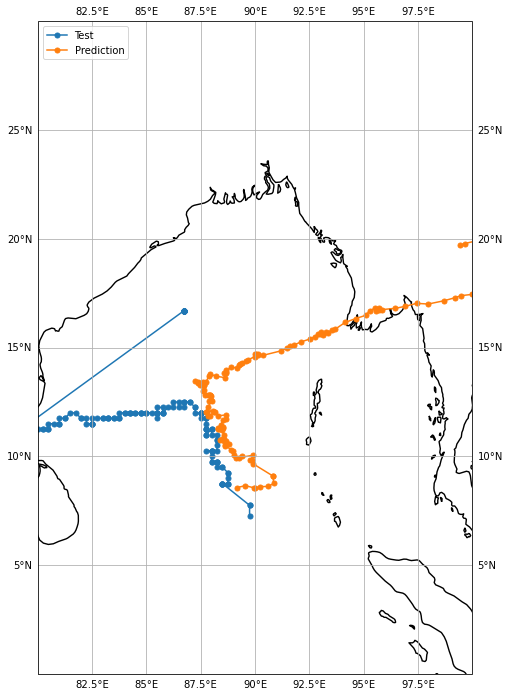

In [24]:
##### import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# defining a function  to plot cyclone data

def plot_cyclone_data(cyclone_data):
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.plot(cyclone_data['lon_test'], cyclone_data['lat_test'], '-o', markersize=5, transform=ccrs.PlateCarree())
    ax.plot(cyclone_data['lon_pred'], cyclone_data['lat_pred'], '-o', markersize=5, transform=ccrs.PlateCarree())
    ax.set_extent([80, 100, 0, 30], crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=1.4)
    ax.gridlines(draw_labels=True)
    plt.legend(['Test', 'Prediction'], loc='upper left')
    plt.show()


# Taking the cyclone number from input
#cyclone_number = input("Enter cyclone number: ")
cyclone_number = 40
# Separating the data for the desired cyclone
cyclone_data = random_dataset[random_dataset['cyclone_number'] == float(cyclone_number)]

# Plotting the cyclone data
print(cyclone_data)
plot_cyclone_data(cyclone_data)

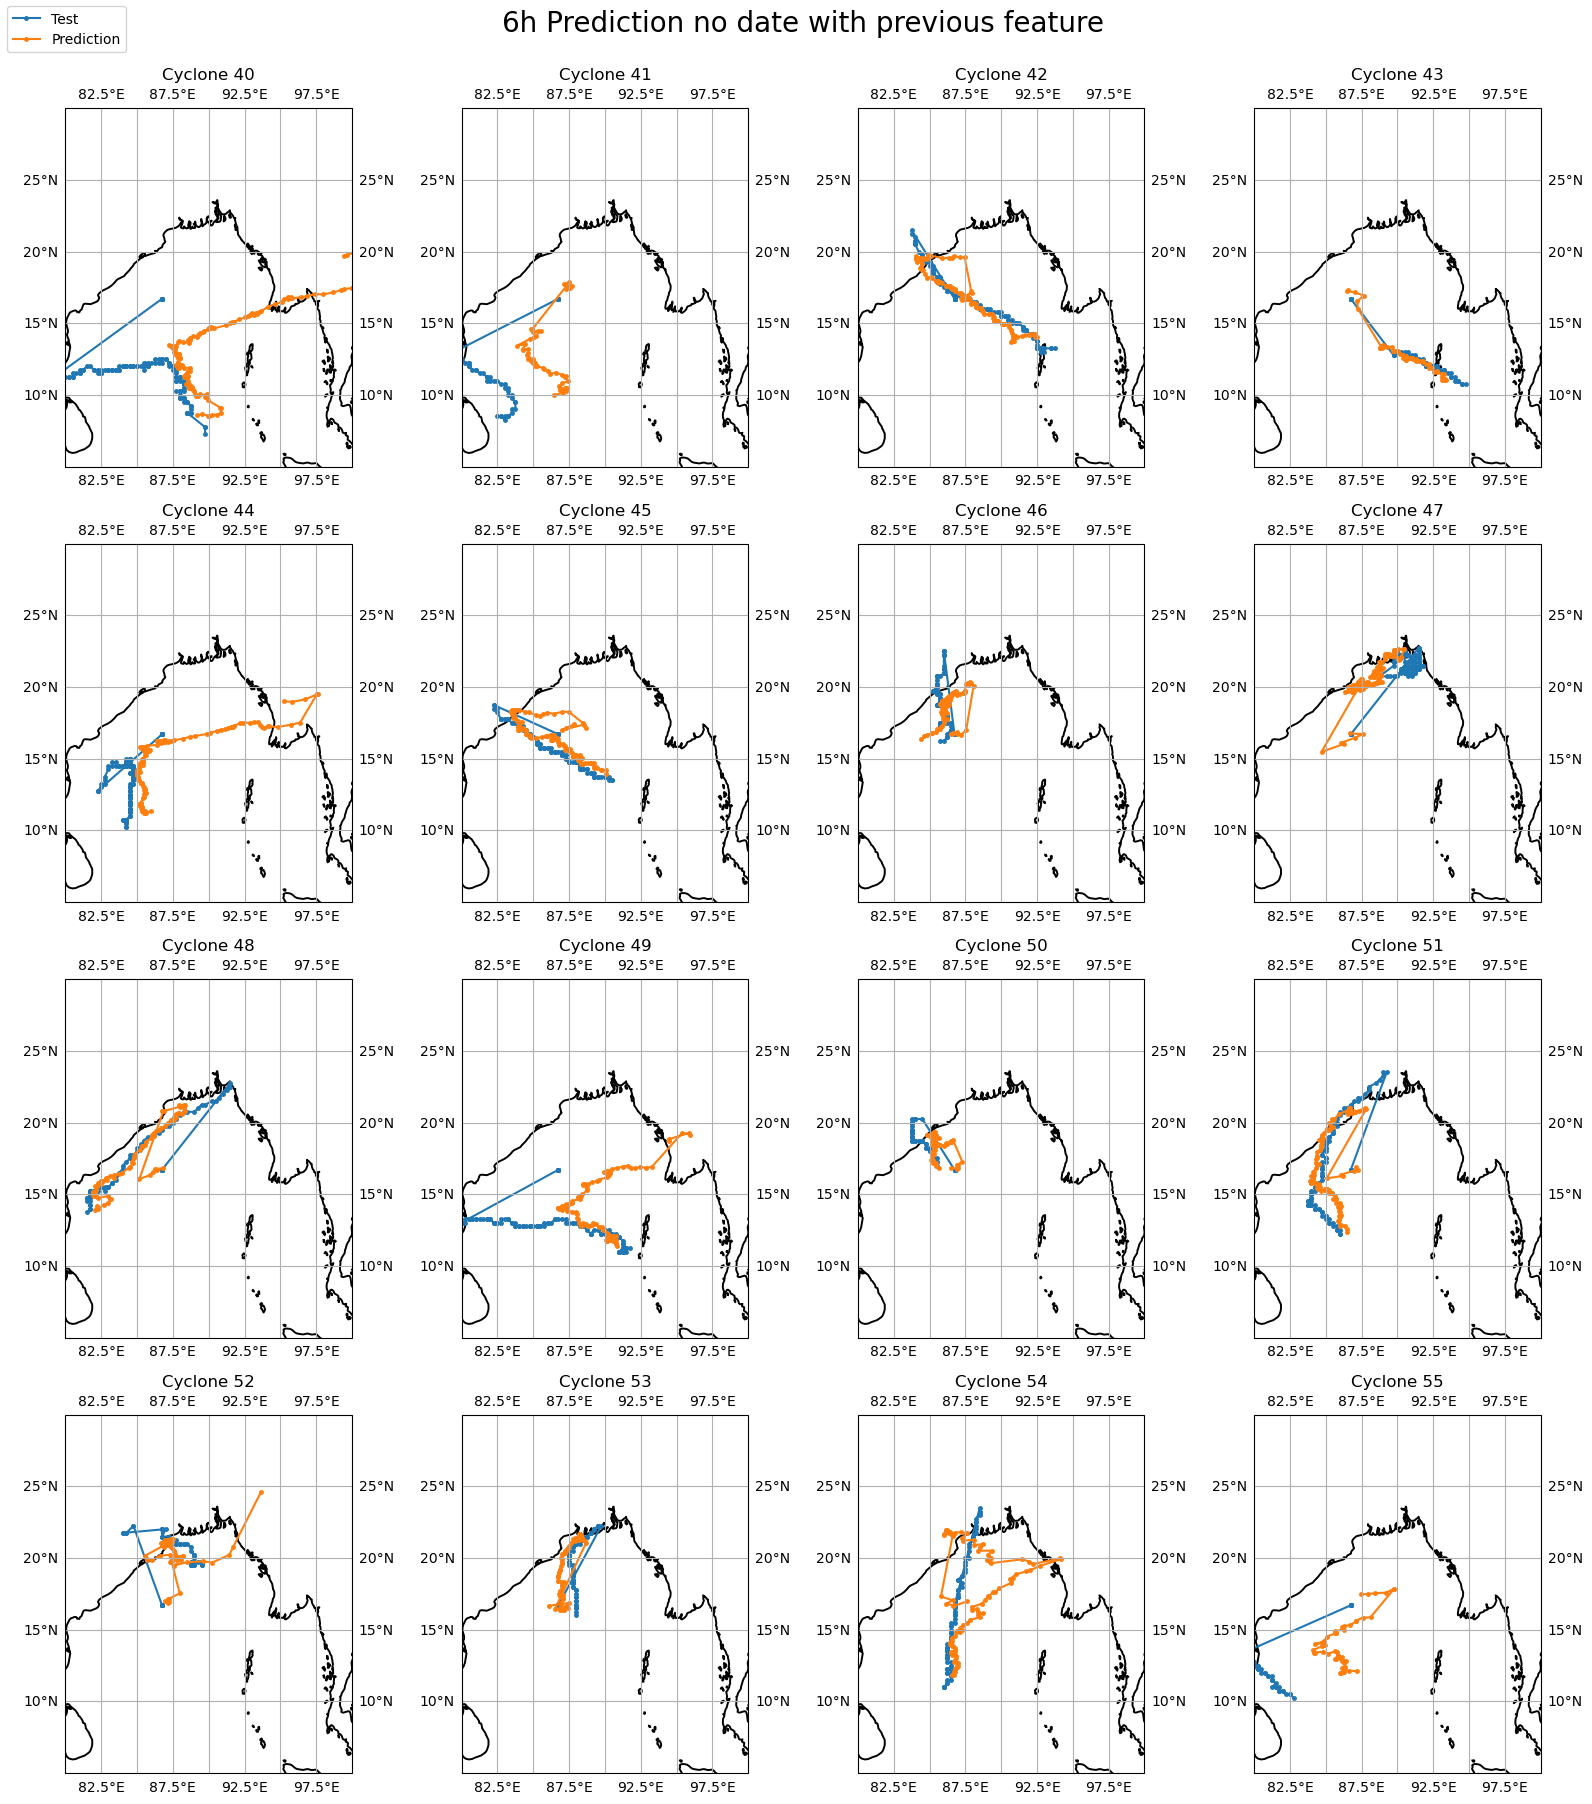

In [25]:
fig, axs = plt.subplots(4, 4, figsize=(16, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(4):
    for j in range(4):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 40

        # Separating the data for the desired cyclone
        cyclone_data = random_dataset[random_dataset['cyclone_number'] == float(cyclone_number)]
        #cyclone_data = cyclone_data.drop(cyclone_data.index[0]) #removing the last row as it creates problem


        # Plotting the cyclone data
        axs[i,j].plot(cyclone_data['lon_test'], cyclone_data['lat_test'], '-o', markersize=2.5, transform=ccrs.PlateCarree())
        axs[i,j].plot(cyclone_data['lon_pred'], cyclone_data['lat_pred'], '-o', markersize=2.5, transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 5, 30], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].gridlines(draw_labels=True)
        axs[i,j].set_title(f"Cyclone {cyclone_number}")
        #axs[i,j].legend(['Test', 'Prediction'], loc='upper left')

# Set the overall title for the subplot
fig.suptitle("6h Prediction no date with previous feature", fontsize=20, y=1)
fig.legend(['Test', 'Prediction'], loc='upper left')

# Adjust spacing between subplots
fig.tight_layout()


In [26]:
#for i in range(4):
#    for j in range(4):
#        k = i*4 + j + 40
#        print(k)

In [27]:
# 6h